# Pour vous préparer au TP3 - Méthode des moindres carrés généralisée

## 1 - Consignes
Ce TP sera un examen d'une durée de 3h. Il s'agira donc d'un travail personnel, en autonomie, sur un ordinateur du DLST  (sans accès à internet) et régi par les régles suivantes :

- $\color{red}{\textbf{Téléphone portable et autres objets connectés interdits}}$
- $\color{red}{\textbf{Aucun document ni fichier autorisé à l'exception des 3 notebooks fournis dans leur état d'origine (sans ajouts): TP1, TP2 et TP3 }}$
- Toute tentative d'utiliser un fichier ou un document autre que ceux fournis sera considéré comme une tentative de fraude et traitée en conséquence
- Toute consigne/modalité non-respectée sera sanctionnée de points en moins sur la note de votre évaluation 

## 2 - Modalités
- Enregistrez ce notebook en le nommant TP3_NOM_Prenom.ipynb
- Indiquez vos nom, prénom, parcours et groupe dans la cellule suivante

In [1]:
# NOM :
# PRENOM :
# PARCOURS & GROUPE : 

- $\color{red}{\textbf{Chaque ligne de commande de votre notebook sera expliquée en commentaire}}$
- A la fin de la séance, téléchargez ce notebook complété sur le bureau et envoyez-le par email $\textbf{à partir de votre adresse étudiante}$ en cliquant sur le lien [CLIQUEZ ICI](mailto:arnaud.chauviere@univ-grenoble-alpes.fr)

## 3 - Rappels

### 3.1 - Présentation de la méthode 
On considère un nuage $\mathcal{N}$ de $n$ points $(x_i,y_i)_{i\in\{1,...,n\}}$ donné par les vecteurs lignes $X=[x_1\; x_2  \;... \;  x_n]$ pour les abscisses $x_i$ et  $Y=[y_1\; y_2  \;... \;  y_n]$ pour les ordonnées $y_i$.
On cherche une fonction $f$ passant au plus près des points du nuage, c'est à dire à approcher les valeurs discrètes des ordonnées $y_i$ par une fonction continue de la forme
$$ f(x)= \displaystyle\sum_{j=1}^{m} a_j\,f_j(x) $$
où les $m$ fonctions élémentaires $f_j$ sont données. 
Le problème est donc de déterminer les valeurs des $m$ coefficients $a_j$ tel que le modèle - la fonction $f$ - passe au plus près des points du nuage, en utilisant la "méthode des moindres carrés".

Cette méthode consiste à minimiser une erreur $J(a_1, a_2,\ldots,a_m) = \mid\mid E\mid\mid^2$ où le vecteur $E$ contient les $n$ erreurs locales $(e_i)_{i\in\{1,...,n\}}$ (appelées résidus) :

$$
E = \left[ \begin{array}{c} e_1 \\ e_2 \\ .. \\ e_n \end{array}\right] = \left[ \begin{array}{c} y_1-f(x_1) \\ y_2-f(x_2) \\ .. \\ y_n-f(x_n) \end{array}\right]
$$

### 3.2 - Méthodologie
- Construire la matrice $F$ à $n$ lignes et $m$ colonnes dite "matrice de régresseurs" définie par les $n$ lignes
$$
[f_1(x_i)\;f_2(x_i)\; \ldots f_m(x_i)],\;\;i=1,...,n
$$
où $x_i$ sont les abscisses contenues dans le vecteur $X$.


- Calculer la matrice $M=^t\hspace{-1ex} F\, F$ et le second membre $B=^t\hspace{-1ex} F\, Y$ du système des équations normales $MA=B$, où $A$ est le vecteur inconnu qui contient les $m$ paramètres $a_j$ à déterminer.


- Résoudre le système des équations normales et obtenir les valeurs numériques $a_j^*$ pour $j\in\{1,\ldots,m\}$ des paramètres qui minimisent la distance entre le modèle et les points du nuage.

## 4 - Travail & résultats attendus lors de la séance

### 4.1 - Ce que vous devrez faire en python en complétant ce notebook

1. Construire et résoudre le système des équations normales associé aux données ci-dessous (section 5)


2. Représenter sur la même figure avec titre, légende et nom des axes :
    - le nuage $\mathcal{N}$ de $n$ points
    - la courbe continue et lisse du modèle, c'est à dire de la fonction $f(x)$ pour les $m$ valeurs calculées $a_j^*$ des paramètres
    - les prévisions du modèle aux abscisses $x_i$ du nuage de points, c'est à dire les $n$ points $(x_i,f(x_i))_{i\in\{1,...,n\}}$


3. Construire le vecteur colonne $E$ qui contient les $n$ erreurs locales $e_i=y_i-f(x_i)$


4. Afin de discuter de la qualité des prévisions du modèle, calculer les quantités ci-dessous :
    - l'erreur globale, c'est à dire le carré de la norme euclidienne du vecteur d'erreur $E$
    - la valeur moyenne ${\mid e\mid}_{moy}$ des valeurs absolues des erreurs locales
    - la valeur maximale ${\mid e\mid}_{max}$ des valeurs absolues des erreurs locales


### 4.2 - Ce que votre enseignant attend et notera
Ce notebook complété tel que : 
- structuré étape par étape (grace à des cellules séparées)
- expliqué avec vos commentaires dans chaque cellule
- sans erreur d'exécution

et qui 
- calcule et affiche les valeurs numériques des $m$ paramètres $a_j^*$
- affiche les graphes demandées
- calcule et affiche les valeurs numériques des erreurs demandées (question 4)



## 5 - Un exemple de données pour vous entrainer avant la séance

#### Le nuage $\mathcal{N}$ de $n=6$ points :
$$
\begin{array}{rrrrrr}
X = [&
\hspace{-3mm} -0.23 & 0.47 & -0.78 & 0.12 & 0.99 & 1.63]\\[2mm]
Y = [&
1.48 & 0.02 & 2.51 & 0.64 & -1.07 & -2.21]
\end{array}
$$

#### Les $m=2$ fonctions élémentaires du modèle $f(x)$ pour faire le cas particulier de la régression linéaire : 
$$
f_1(x) = x \quad \mbox{et} \quad f_2(x) = 1
$$

In [3]:
import matplotlib.pyplot as plt
import numpy as np

#Je vais crée les vecteurs en ligne de X et Y donnée

X = np.array([-0.23, 0.47, -0.78, 0.12, 0.99, 1.63])
Y = np.array([1.48, 0.02, 2.51, 0.64, -1.07, -2.21])

print ("X = {}".format(X))
print ("Y = {}".format(Y))

#Créeons la matrice F de 2 colonnes et 6 lignes
F = np.ones((6,2))
F[:,0]=X

print ("F = \n {}".format(F))
print ("Taille = {}".format(np.shape(F)))


X = [-0.23  0.47 -0.78  0.12  0.99  1.63]
Y = [ 1.48  0.02  2.51  0.64 -1.07 -2.21]
F = 
 [[-0.23  1.  ]
 [ 0.47  1.  ]
 [-0.78  1.  ]
 [ 0.12  1.  ]
 [ 0.99  1.  ]
 [ 1.63  1.  ]]
Taille = (6, 2)


In [4]:
#Calculons la matrice M
M = F.T@F
print ("M = {}".format(M))

#Calculons la matrice B

B = F.T@Y
print ("B = {}".format(B))

M = [[4.5336 2.2   ]
 [2.2    6.    ]]
B = [-6.8736  1.37  ]


In [5]:
#Determinons A le vecteur inconnu

A = np.linalg.solve(M, B)
print("La solution = A ={}".format(A))

#Pour verifer
print("M*A = {} ce qui correspond aux valeur B".format(np.dot(M,A)))

La solution = A =[-1.97908915  0.95399936]
M*A = [-6.8736  1.37  ] ce qui correspond aux valeur B


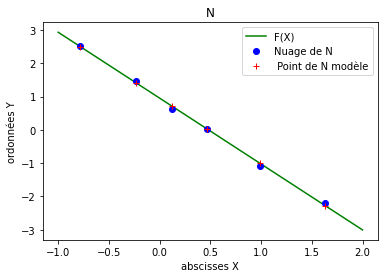

In [10]:
#Intervalle sur x
a = -1
b = 2
#Nombre de points sur l'intervalle
N = 1000

x1 = np.linspace(a, b, N)

#
y1 = -1.97908915*x1 + 0.95399936

y2 = -1.97908915*X + 0.95399936

#droite de F(X)
plt.plot(x1, y1, "g", label = "F(X)")

#Nuage de points N
plt.plot(X, Y, "ob", label = "Nuage de N")

#Valeurs théorique de N
plt.plot(X, y2, "+r", label = " Point de N modèle")

plt.title("N")
plt.xlabel("abscisses X")
plt.ylabel("ordonnées Y")
plt.legend()
plt.show()

In [7]:
E = np.array(Y-y2)
print (E)

[ 0.07081014 -0.00382746  0.0123111  -0.07650866 -0.0647011   0.06191595]


In [9]:
erreurglobale=0
n=6

for i in range(n):
    Eglobale = erreurglobale + E[i] + E[i]
    erreurglobale = Eglobale
print (Eglobale)

-6.000000124517513e-08
